# SpaceX Falcon 9 First Stage Landing Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import urllib.request

In [7]:
URL = ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
filename = ('dataset_part_2_csv')
urllib.request.urlretrieve(URL, filename)

('dataset_part_2_csv', <http.client.HTTPMessage at 0x2592915c650>)

In [10]:
df=pd.read_csv('dataset_part_2_csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [13]:
import warnings
warnings.filterwarnings('ignore')

### Primero, intentemos ver cómo las variables FlightNumber (que indica los intentos continuos de lanzamiento) y Payload afectarían el resultado del lanzamiento.

Podemos trazar el número de vuelo frente a la masa de carga útil y superponer el resultado del lanzamiento. Vemos que a medida que aumenta el número de vuelos, es más probable que la primera etapa aterrice con éxito. La masa de la carga útil también es importante; Parece que cuanto más masiva es la carga útil, es menos probable que regrese la primera etapa.

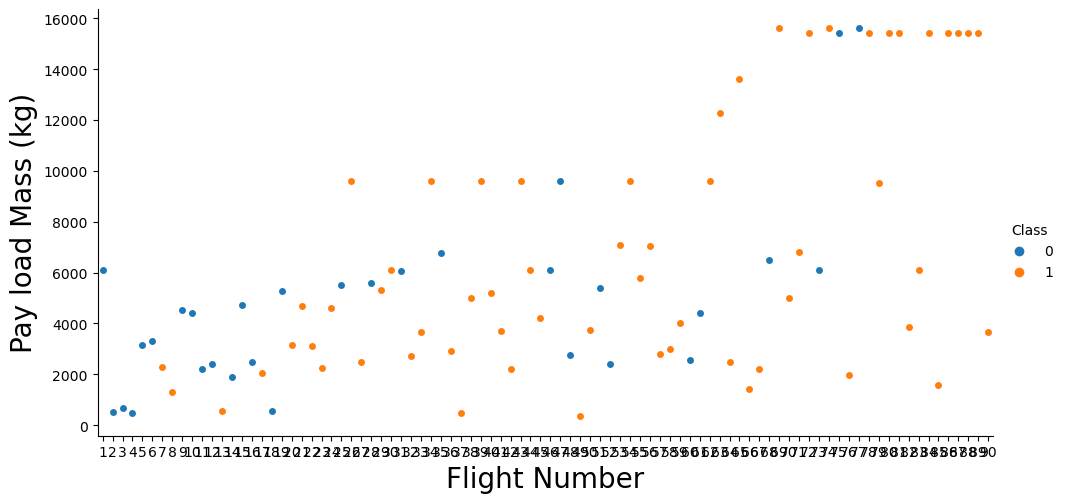

In [26]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Vemos que diferentes sitios de lanzamiento tienen diferentes tasas de éxito. CCAFS LC-40 tiene una tasa de éxito del 60 %, mientras que KSC LC-39A y VAFB SLC 4E tiene una tasa de éxito del 77 %.

A continuación, profundicemos en cada sitio y visualicemos sus registros de lanzamiento detallados.

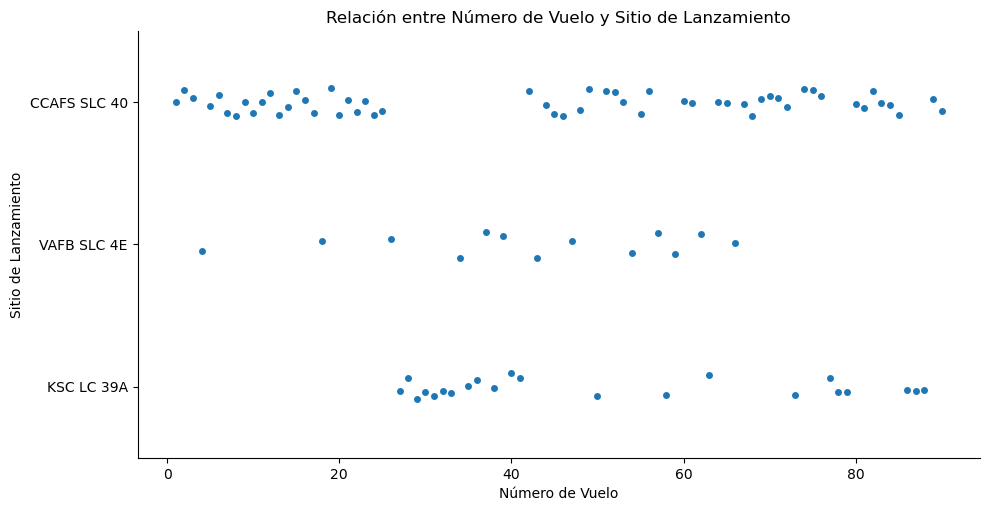

In [25]:
sns.catplot(x='FlightNumber', y='LaunchSite', data=df, aspect=2)
plt.xlabel('Número de Vuelo')
plt.ylabel('Sitio de Lanzamiento')
plt.title('Relación entre Número de Vuelo y Sitio de Lanzamiento')
plt.show()

Utilice la función catplot para trazar FlightNumber vs LaunchSite, establezca el parámetro x en FlightNumber, establezca y en Launch Site y establezca el tono del parámetro en 'clase'

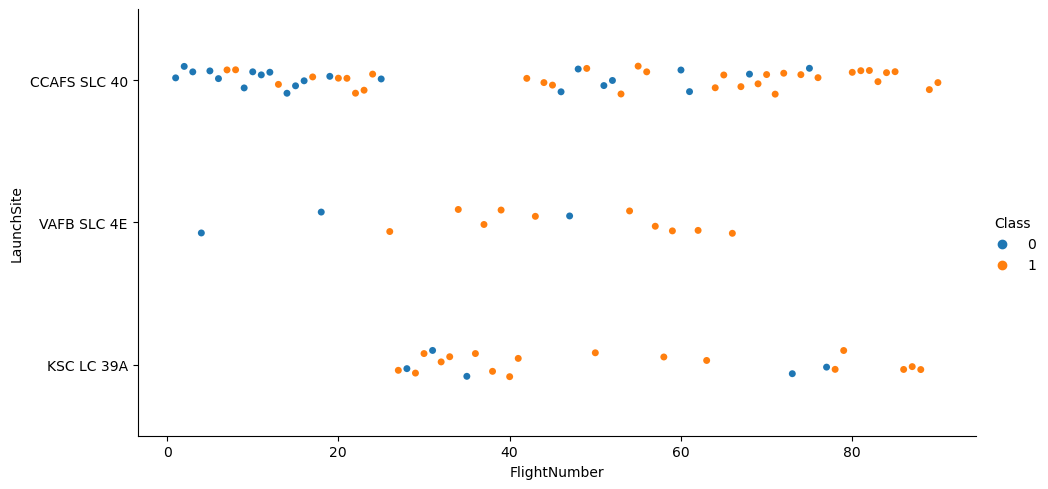

In [27]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, kind="strip", aspect= 2)

plt.show()

Ahora intente explicar los patrones que encontró en los gráficos de puntos de dispersión del número de vuelo frente al sitio de lanzamiento.

### TAREA 2: Visualizar la relación entre la carga útil y el sitio de lanzamiento

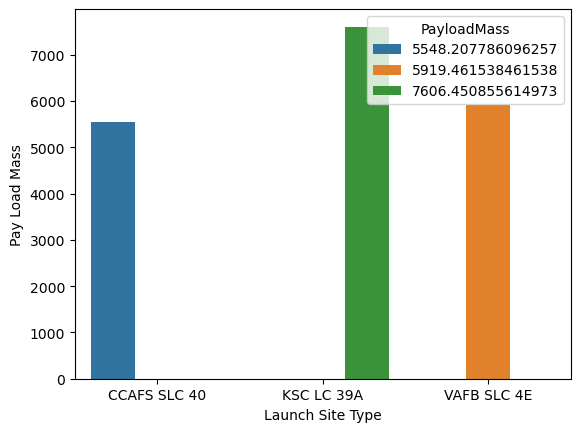

In [41]:
df_pay_load = df.groupby(df['LaunchSite'], as_index=False).agg({"PayloadMass": "mean"})
sns.barplot(x='LaunchSite', y='PayloadMass', data=df_pay_load, hue='PayloadMass')
plt.xlabel("Launch Site Type")
plt.ylabel("Pay Load Mass")
plt.show()


También queremos observar si existe alguna relación entre los sitios de lanzamiento y su masa de carga útil.

#### Trace un gráfico de puntos de dispersión con el eje x como masa de carga útil (kg), el eje y como el sitio de lanzamiento y el tono como el valor de clase.

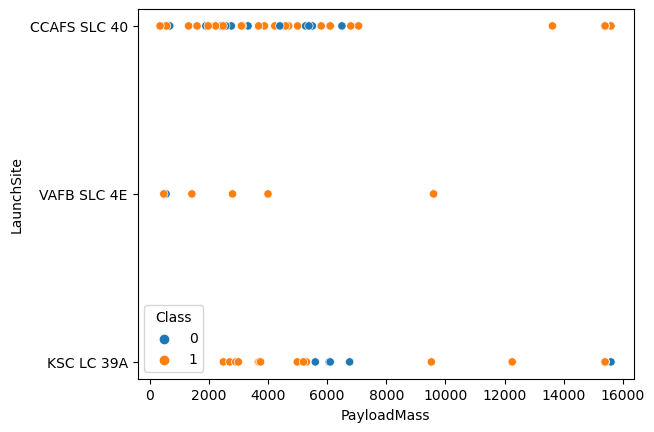

In [47]:
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class')
plt.show()

Ahora, si observas Payload vs. En el gráfico de puntos de dispersión del sitio de lanzamiento que encontrará para el sitio de lanzamiento VAFB-SLC, no se lanzan cohetes con una masa de carga pesada (superior a 10000).

### TAREA 3: Visualizar la relación entre la tasa de éxito de cada tipo de órbita

Creemos un gráfico de barras para la tasa de éxito de cada órbita.

A continuación, queremos comprobar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.

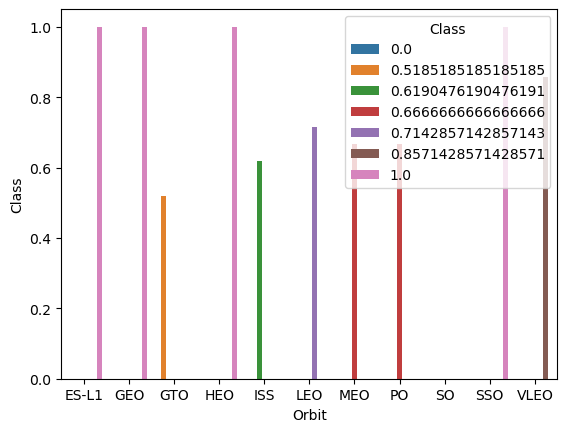

In [49]:
Orbit = df.groupby(df['Orbit'], as_index=False).agg({"Class": "mean"})
sns.barplot(x='Orbit', y='Class', data=Orbit, hue='Class')
plt.xlabel("Orbit")
plt.ylabel("Class")
plt.show()

### TAREA 4: Visualizar la relación entre FlightNumber y tipo de órbita

De manera similar, podemos trazar los gráficos de puntos de dispersión de carga útil versus órbita para revelar la relación entre la carga útil y el tipo de órbita.

Trazar un gráfico de puntos de dispersión con el eje x como carga útil, el eje y como órbita y el tono como valor de clase

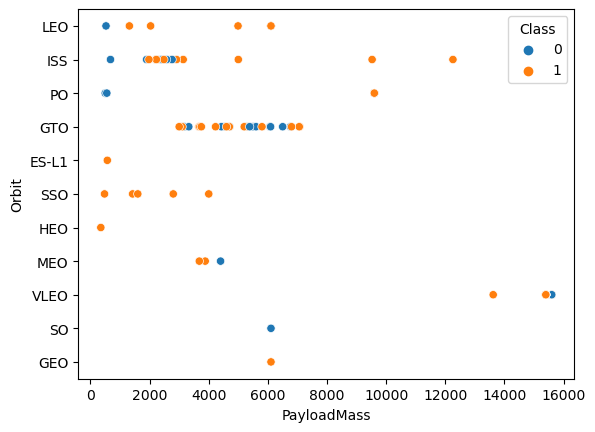

In [55]:
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
plt.show()

Con cargas útiles pesadas, la tasa de aterrizaje exitoso o positivo es mayor para Polar, LEO e ISS.

Sin embargo, para GTO no podemos distinguir esto bien ya que tanto la tasa de aterrizaje positiva como la tasa de aterrizaje negativa (misión fallida) están presentes aquí.

### TAREA 6: Visualizar la tendencia anual de éxito del lanzamiento

Puede trazar un gráfico de líneas con el eje x como Año y el eje y como tasa de éxito promedio, para obtener la tendencia promedio de éxito de lanzamiento.

La función le ayudará a obtener el año a partir de la fecha:

In [71]:
# Una función para extraer años de la fecha.
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Year'] = year
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


Trazar un gráfico de líneas con el eje x como el año extraído y el eje y como la tasa de éxito

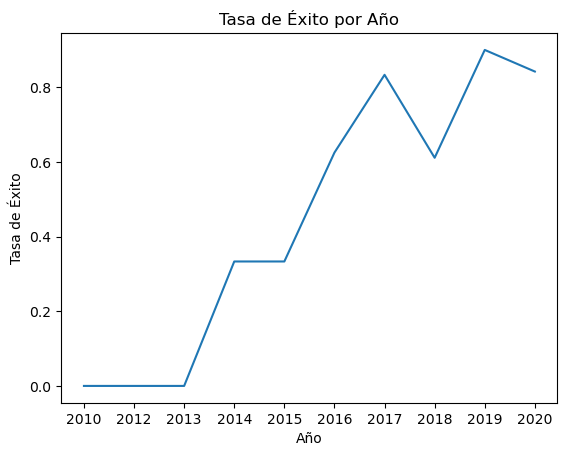

In [74]:
df_year = df.groupby(df['Year'], as_index=False).agg({"Class" : "mean"})
sns.lineplot(y='Class', x='Year', data=df_year)
plt.title('Tasa de Éxito por Año')
plt.xlabel('Año')
plt.ylabel('Tasa de Éxito')
plt.show()

Se puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2020.

Ingeniería de características

A estas alturas, debería obtener algunos conocimientos preliminares sobre cómo cada variable importante afectaría la tasa de éxito; seleccionaremos las características que se utilizarán en la predicción del éxito en el módulo futuro.

In [75]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TAREA 7: Crear variables ficticias para columnas categóricas

Utilice la función get_dummies y el marco de datos de características para aplicar OneHotEncoder a las columnas Orbits, LaunchSite, LandingPad y Serial. Asigne el valor a la variable características_one_hot, muestre los resultados usando el encabezado del método. Su marco de datos de resultados debe incluir todas las funciones, incluidas las codificadas.

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [92]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(features[['Orbit','LaunchSite','LandingPad', 'Serial']])
features_one_hot = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Orbit','LaunchSite','LandingPad', 'Serial']))
print(features_one_hot)

    Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  \
0           0.0        0.0        0.0        0.0        0.0        1.0   
1           0.0        0.0        0.0        0.0        0.0        1.0   
2           0.0        0.0        0.0        0.0        1.0        0.0   
3           0.0        0.0        0.0        0.0        0.0        0.0   
4           0.0        0.0        1.0        0.0        0.0        0.0   
..          ...        ...        ...        ...        ...        ...   
85          0.0        0.0        0.0        0.0        0.0        0.0   
86          0.0        0.0        0.0        0.0        0.0        0.0   
87          0.0        0.0        0.0        0.0        0.0        0.0   
88          0.0        0.0        0.0        0.0        0.0        0.0   
89          0.0        0.0        0.0        0.0        0.0        0.0   

    Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  ...  Serial_B1048  Serial_B1049  \
0         0.0       0.0       

### TAREA 8: Transmitir todas las columnas numéricas a float64

In [94]:
features_one_hot = features_one_hot.astype('float64')
print(features_one_hot)

    Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  \
0           0.0        0.0        0.0        0.0        0.0        1.0   
1           0.0        0.0        0.0        0.0        0.0        1.0   
2           0.0        0.0        0.0        0.0        1.0        0.0   
3           0.0        0.0        0.0        0.0        0.0        0.0   
4           0.0        0.0        1.0        0.0        0.0        0.0   
..          ...        ...        ...        ...        ...        ...   
85          0.0        0.0        0.0        0.0        0.0        0.0   
86          0.0        0.0        0.0        0.0        0.0        0.0   
87          0.0        0.0        0.0        0.0        0.0        0.0   
88          0.0        0.0        0.0        0.0        0.0        0.0   
89          0.0        0.0        0.0        0.0        0.0        0.0   

    Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  ...  Serial_B1048  Serial_B1049  \
0         0.0       0.0       

Ahora podemos exportarlo a un CSV para la siguiente sección, pero para que las respuestas sean consistentes, en la próxima práctica de laboratorio proporcionaremos datos en un rango de fechas preseleccionado.

In [95]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)